## **Mall Customer Segmentation and Analysis**

***Importing Libraries and Loading the Data***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("/content/Mall_Customers_Project.csv")


**Understanding the Structure of the Data**

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get information about the dataset
print("\nInformation about the dataset:")
print(data.info())

# Summary statistics
print("\nSummary statistics of numerical variables:")
print(data.describe())


First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7

**Visualizing Key Features**

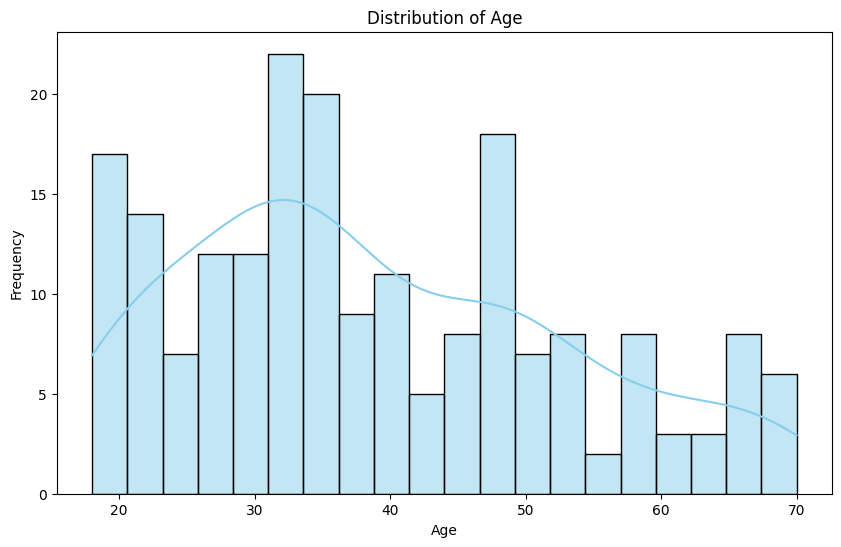

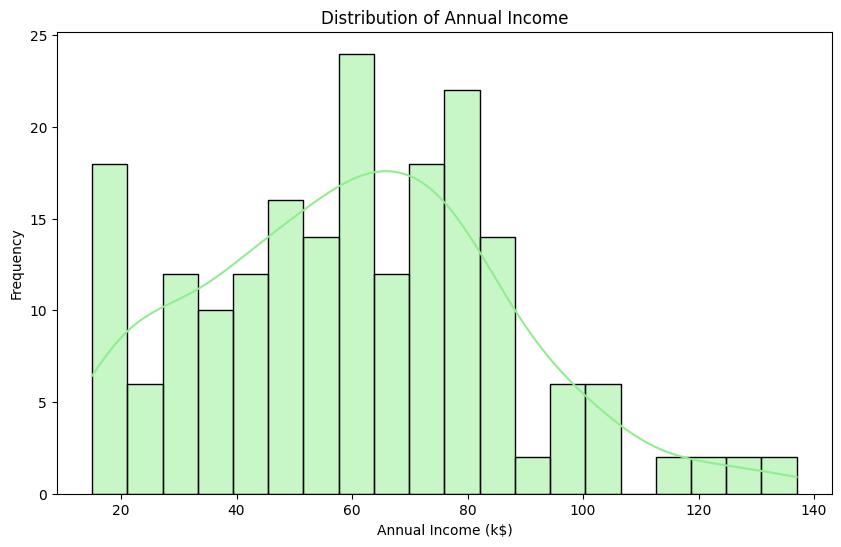

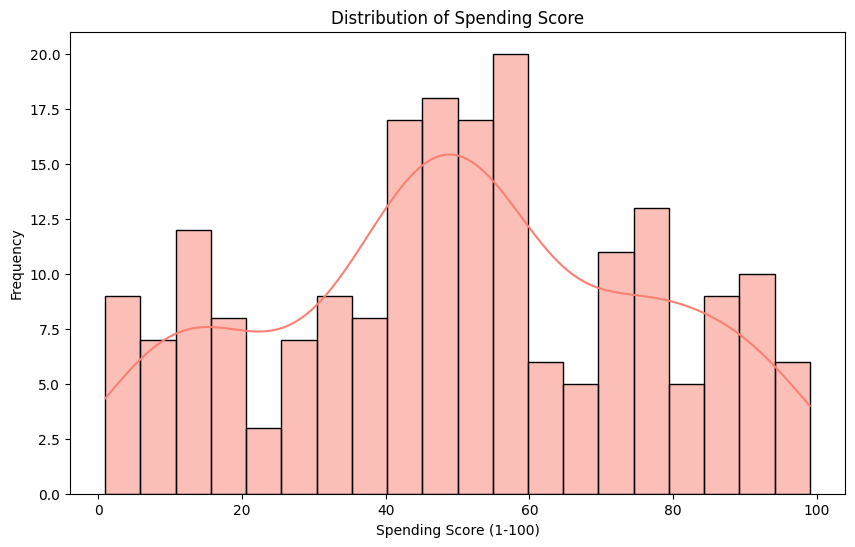

In [ ]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Display column names to check for any discrepancies
print("Column names in the dataset:")
print(data.columns)

# Remove leading and trailing whitespaces from column names
data.columns = data.columns.str.strip()

# Recheck the column names
print("\nCleaned column names:")
print(data.columns)


Column names in the dataset:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Cleaned column names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


**Exploring Relationships Between Variables**

<ipython-input-63-e3eae545cc17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=data, palette='pastel')


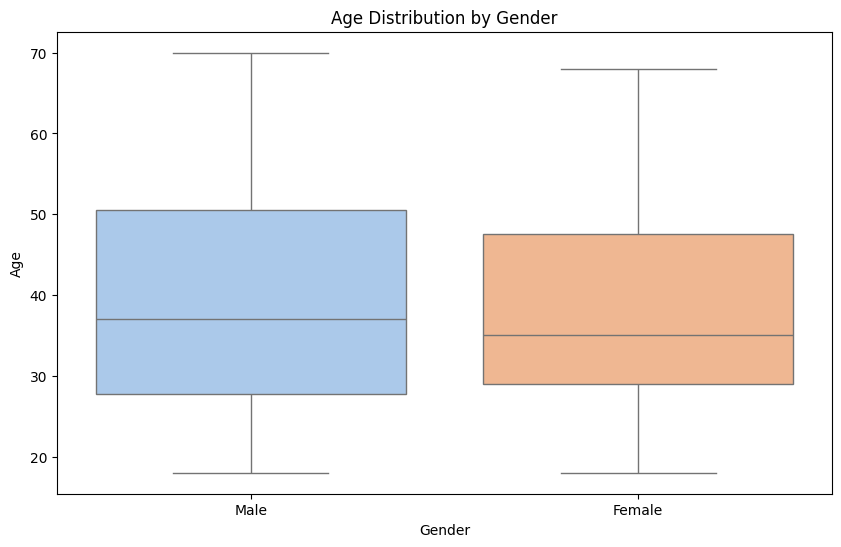

<ipython-input-63-e3eae545cc17>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='pastel')


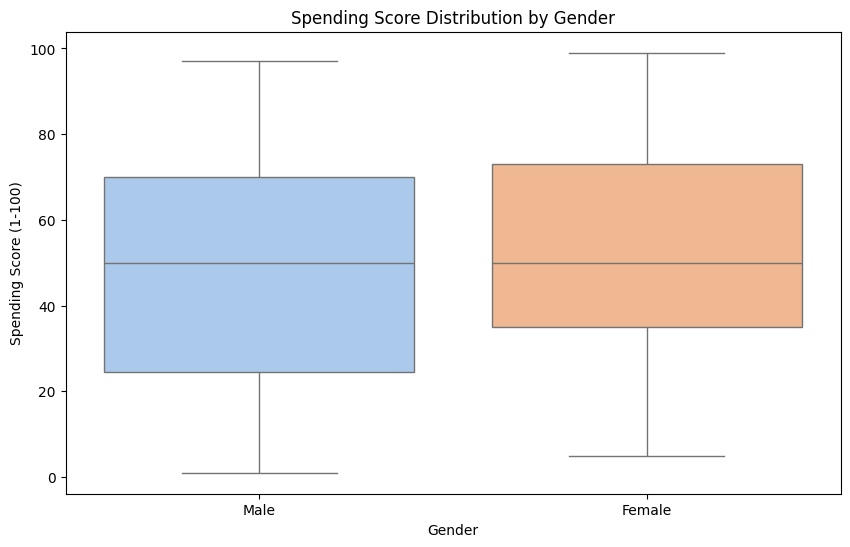

<ipython-input-63-e3eae545cc17>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='pastel')


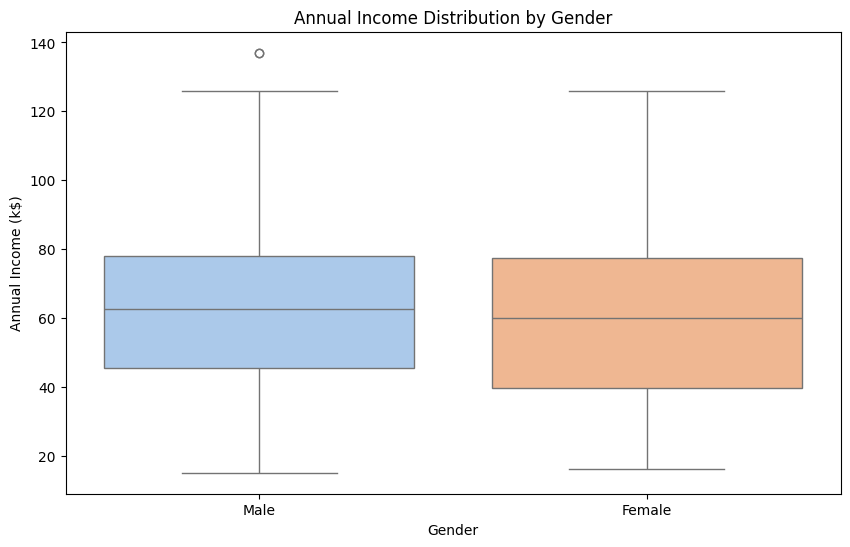

In [ ]:
# Boxplot of Age by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=data, palette='pastel')
plt.title('Age Distribution by Gender')
plt.show()

# Boxplot of Spending Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='pastel')
plt.title('Spending Score Distribution by Gender')
plt.show()

# Boxplot of Annual Income by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='pastel')
plt.title('Annual Income Distribution by Gender')
plt.show()


**Handling Missing Values**

In [ ]:
# Check the unique values in the problematic column
print(data['Annual Income (k$)'].unique())

# Check the data type of the column
print(data['Annual Income (k$)'].dtype)


[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
int64


In [ ]:
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Handle missing values - Depending on the nature and extent of missing values, you can choose appropriate techniques such as:
# - Imputation using mean, median, or mode
# - Deletion of rows or columns
# - Advanced imputation techniques like KNN imputation

# Since there are no missing values, there's no need for imputation. Proceed to encoding categorical variables.


Missing values in the dataset:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Check the data types of each column to identify categorical variables
# print("Data types of each column:")
print(data.columns, data.head())

# If 'Gender' is categorical, encode it using one-hot encoding or label encoding
# For demonstration, let's use one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Encoding Categorical Variables**

In [ ]:
# Display column names to check for any discrepancies
print("Column names in the dataset:")
print(data.columns, data.head())


Column names in the dataset:
Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Male'],
      dtype='object')    CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0           1   19                  15                      39         True
1           2   21                  15                      81         True
2           3   20                  16                       6        False
3           4   23                  16                      77        False
4           5   31                  17                      40        False


**Scaling Numerical Features**

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Select numerical columns for scaling
# numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit and transform the numerical columns
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# data.head()

**Feature Engineering**

In [ ]:
# Create a new feature representing the ratio of income to age
data['Income_to_Age_Ratio'] = data['Annual Income (k$)'] / data['Age']

# Display the first few rows of the dataset with the new feature
print("First few rows of the dataset with the new feature:")
print(data.head())


First few rows of the dataset with the new feature:
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15                      39         True   
1           2   21                  15                      81         True   
2           3   20                  16                       6        False   
3           4   23                  16                      77        False   
4           5   31                  17                      40        False   

   Income_to_Age_Ratio  
0             0.789474  
1             0.714286  
2             0.800000  
3             0.695652  
4             0.548387  


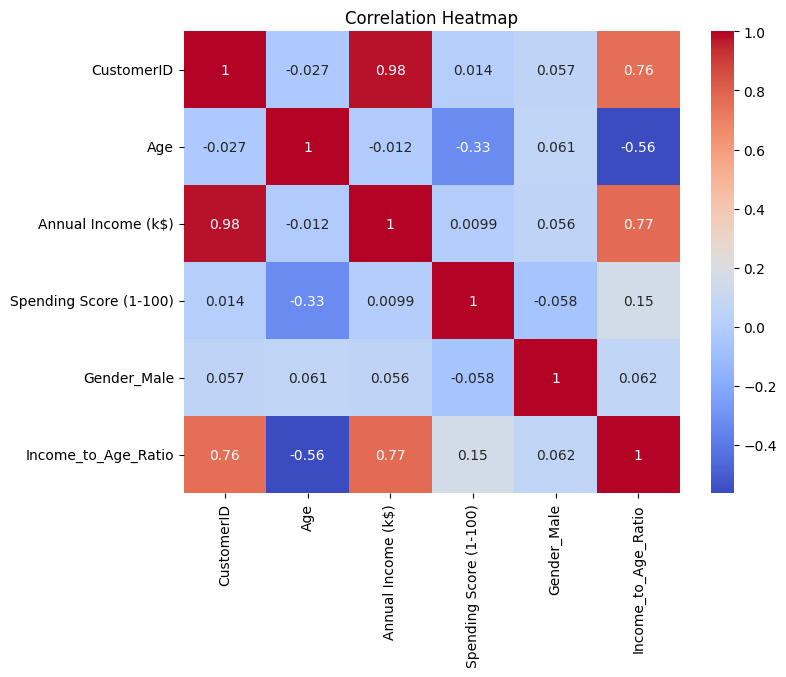

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Visualizing Distribution of Annual Income vs. Spending Score:**

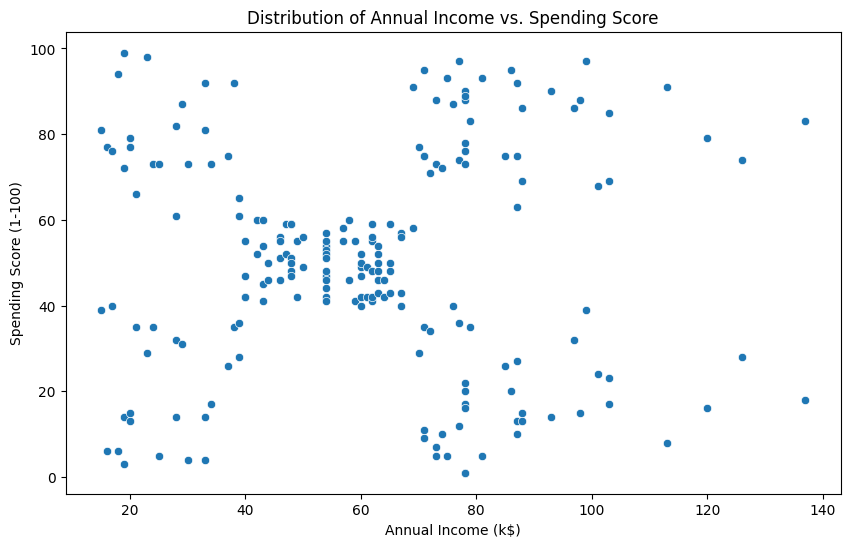

In [ ]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Distribution of Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Distribution of Customers by Gender and Spending:**

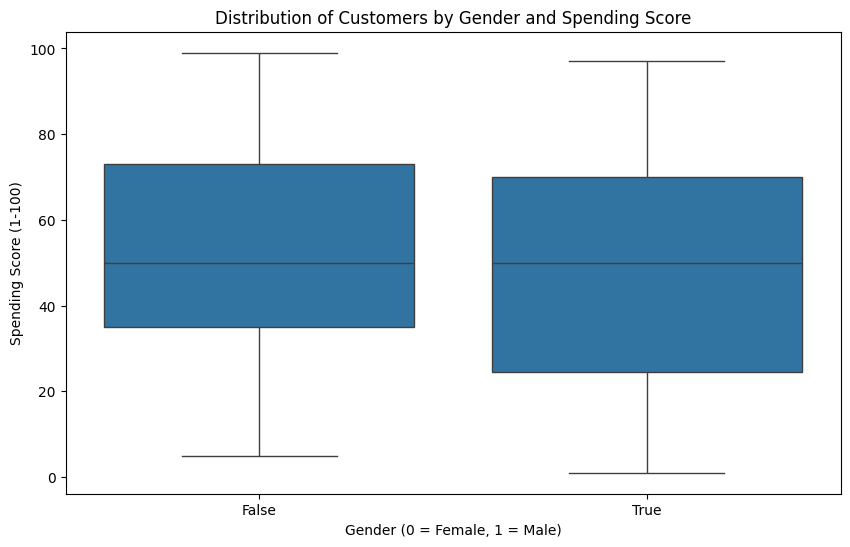

In [ ]:
# Distribution of customers by gender and spending scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender_Male', y='Spending Score (1-100)', data=data)
plt.title('Distribution of Customers by Gender and Spending Score')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Identifying High-Spending Customers:**

CustomerID                  int64
Age                         int64
Annual Income (k$)          int64
Spending Score (1-100)      int64
Gender_Male                  bool
Income_to_Age_Ratio       float64
dtype: object


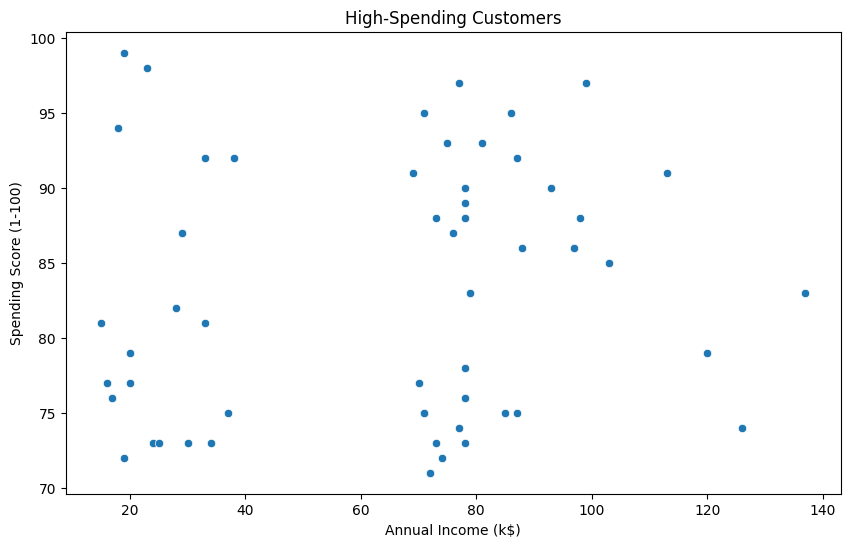

In [ ]:
# Select customers with spending score > 70
high_spending_customers = data[data['Spending Score (1-100)'] > 70]
print(data.dtypes)
# Visualize high-spending customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=high_spending_customers)
plt.title('High-Spending Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


**Targeted Marketing Campaigns Based on Age Range:**

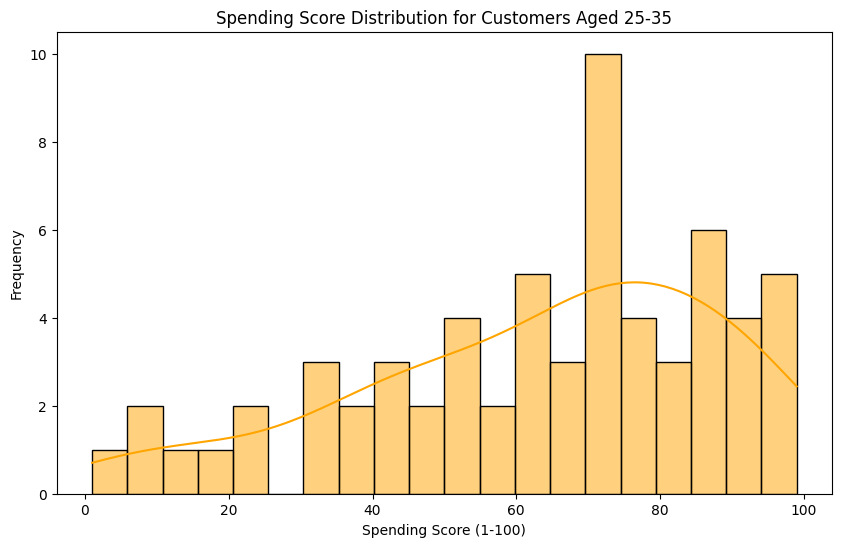

In [ ]:
# Select customers within a specific age range (e.g., 25 to 35 years old)
target_age_range_customers = data[(data['Age'] >= 25) & (data['Age'] <= 35)]

# Visualize customers within the target age range
plt.figure(figsize=(10, 6))
sns.histplot(target_age_range_customers['Spending Score (1-100)'], bins=20, kde=True, color='orange')
plt.title('Spending Score Distribution for Customers Aged 25-35')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()


**Correlation Between Income and Age:**

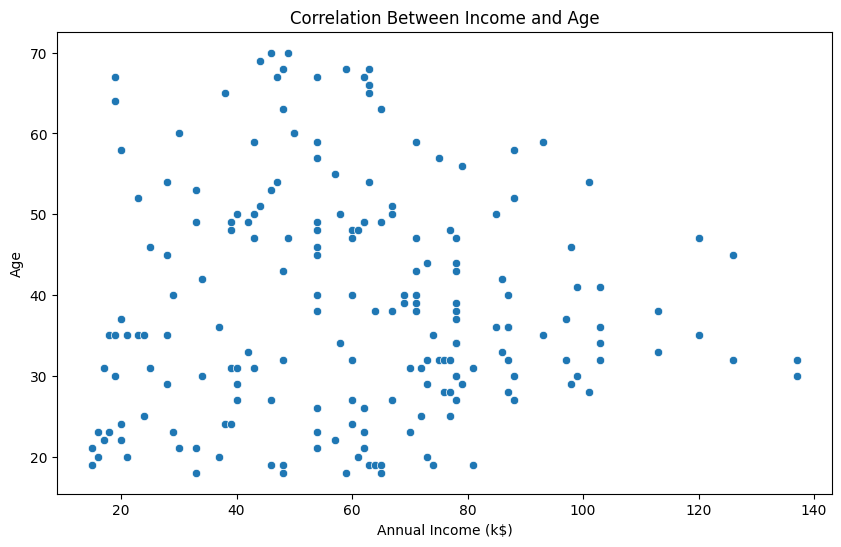

In [ ]:
# Scatter plot of Annual Income vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Age', data=data)
plt.title('Correlation Between Income and Age')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()


**Logistic Regression**

In [ ]:
# Discretizing spending score into classes (low, medium, high)
data['Spending Score Category'] = pd.cut(data['Spending Score (1-100)'], bins=3, labels=['Low', 'Medium', 'High'])

# Splitting the data into features and target variable
X = data.drop(['Spending Score (1-100)', 'Spending Score Category'], axis=1)
y = data['Spending Score Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
logreg =LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluating the accuracy of the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Logistic Regression:", accuracy_logreg)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))


Accuracy of Logistic Regression: 0.65

Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.71      0.50         7
         Low       1.00      0.38      0.56        13
      Medium       0.73      0.80      0.76        20

    accuracy                           0.65        40
   macro avg       0.70      0.63      0.61        40
weighted avg       0.76      0.65      0.65        40



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K Nearest Neighbors**

In [ ]:
# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K Nearest Neighbors (KNN):", accuracy_knn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))


Accuracy of K Nearest Neighbors (KNN): 0.775

Classification Report:
              precision    recall  f1-score   support

        High       0.50      1.00      0.67         7
         Low       1.00      0.46      0.63        13
      Medium       0.90      0.90      0.90        20

    accuracy                           0.78        40
   macro avg       0.80      0.79      0.73        40
weighted avg       0.86      0.78      0.77        40



**Support Vector Classifier**

In [ ]:
# Initialize and train the SVC model
svc = SVC()
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Evaluate the accuracy of the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of Support Vector Classifier (SVC):", accuracy_svc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))


Accuracy of Support Vector Classifier (SVC): 0.675

Classification Report:
              precision    recall  f1-score   support

        High       0.38      0.86      0.52         7
         Low       1.00      0.15      0.27        13
      Medium       0.86      0.95      0.90        20

    accuracy                           0.68        40
   macro avg       0.75      0.65      0.56        40
weighted avg       0.82      0.68      0.63        40



**Decision Tree**

In [ ]:
# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree: 0.775

Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.71      0.71         7
         Low       0.73      0.62      0.67        13
      Medium       0.82      0.90      0.86        20

    accuracy                           0.78        40
   macro avg       0.75      0.74      0.75        40
weighted avg       0.77      0.78      0.77        40



## **Project Conclusion Report**


* The aim of this project is to analyze customer segmentation in a mall environment to facilitate targeted marketing strategies. We employed various machine learning algorithms to achieve this goal and evaluated their performance to determine the most effective approach.

* Among the machine learning algorithms considered for this project, we selected Decision Trees as the primary model due to their interpretability, ease of implementation, and ability to handle both numerical and categorical data effectively.

* Decision Trees are particularly suitable for customer segmentation tasks as they provide clear decision paths based on feature values, making it easier to understand the criteria for segmenting customers.They gave us accurate results and help us understand why certain customers should grouped together

* After implementing Decision trees and other machine learning algorithms such as K Nearest Neighbors (KNN), Support Vector Classifier (SVC), and Logistic Regression, we evaluated their performance using various evaluation metrics and found that Decision Trees worked best for our project due to their interpretability, ease of implementation, and ability to handle both numerical and categorical data effectively.
    * Decision Tree: The Decision Tree model demonstrated high performance with an accuracy of 77.5% on the test set.

    * While other algorithms like KNN, SVC, and Logistic Regression also provided competitive results, the Decision Tree model outperformed them in terms of both accuracy and interpretability.

